In [1]:
from solarmach import SolarMACH, print_body_list

In [2]:
# optional: get list of available bodies/spacecraft
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'Juno', 'Cassini', 'Rosetta', 'Pioneer10',
       'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


In [3]:
# necessary options
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400, 400]   # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:15:00'

# optional parameters
reference_long = 273                             # Carrington longitude of reference (None to omit)
reference_lat = 0                                # Carrington latitude of reference (None to omit)
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = True                        # plot straight line between Sun and body
show_earth_centered_coord = False                # display Earth-aligned coordinate system
reference_vsw = 400                              # define solar wind speed at reference
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker
filename = 'Solar-MACH_'+date.replace(' ', '_')  # define filename of output figure

In [4]:
# optional
# if input coordinates for reference are Stonyhurst, convert them to Carrington for further use
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
reference_long = 2                               # Stonyhurst longitude of reference (None to omit)
reference_lat = 26                               # Stonyhurst latitude of reference (None to omit)
coord = SkyCoord(reference_long*u.deg, reference_lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=date)
coord = coord.transform_to(frames.HeliographicCarrington(observer='Sun'))
reference_long = coord.lon.value                 # Carrington longitude of reference
reference_lat = coord.lat.value                  # Carrington latitude of reference

In [5]:
# initialize
sm = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

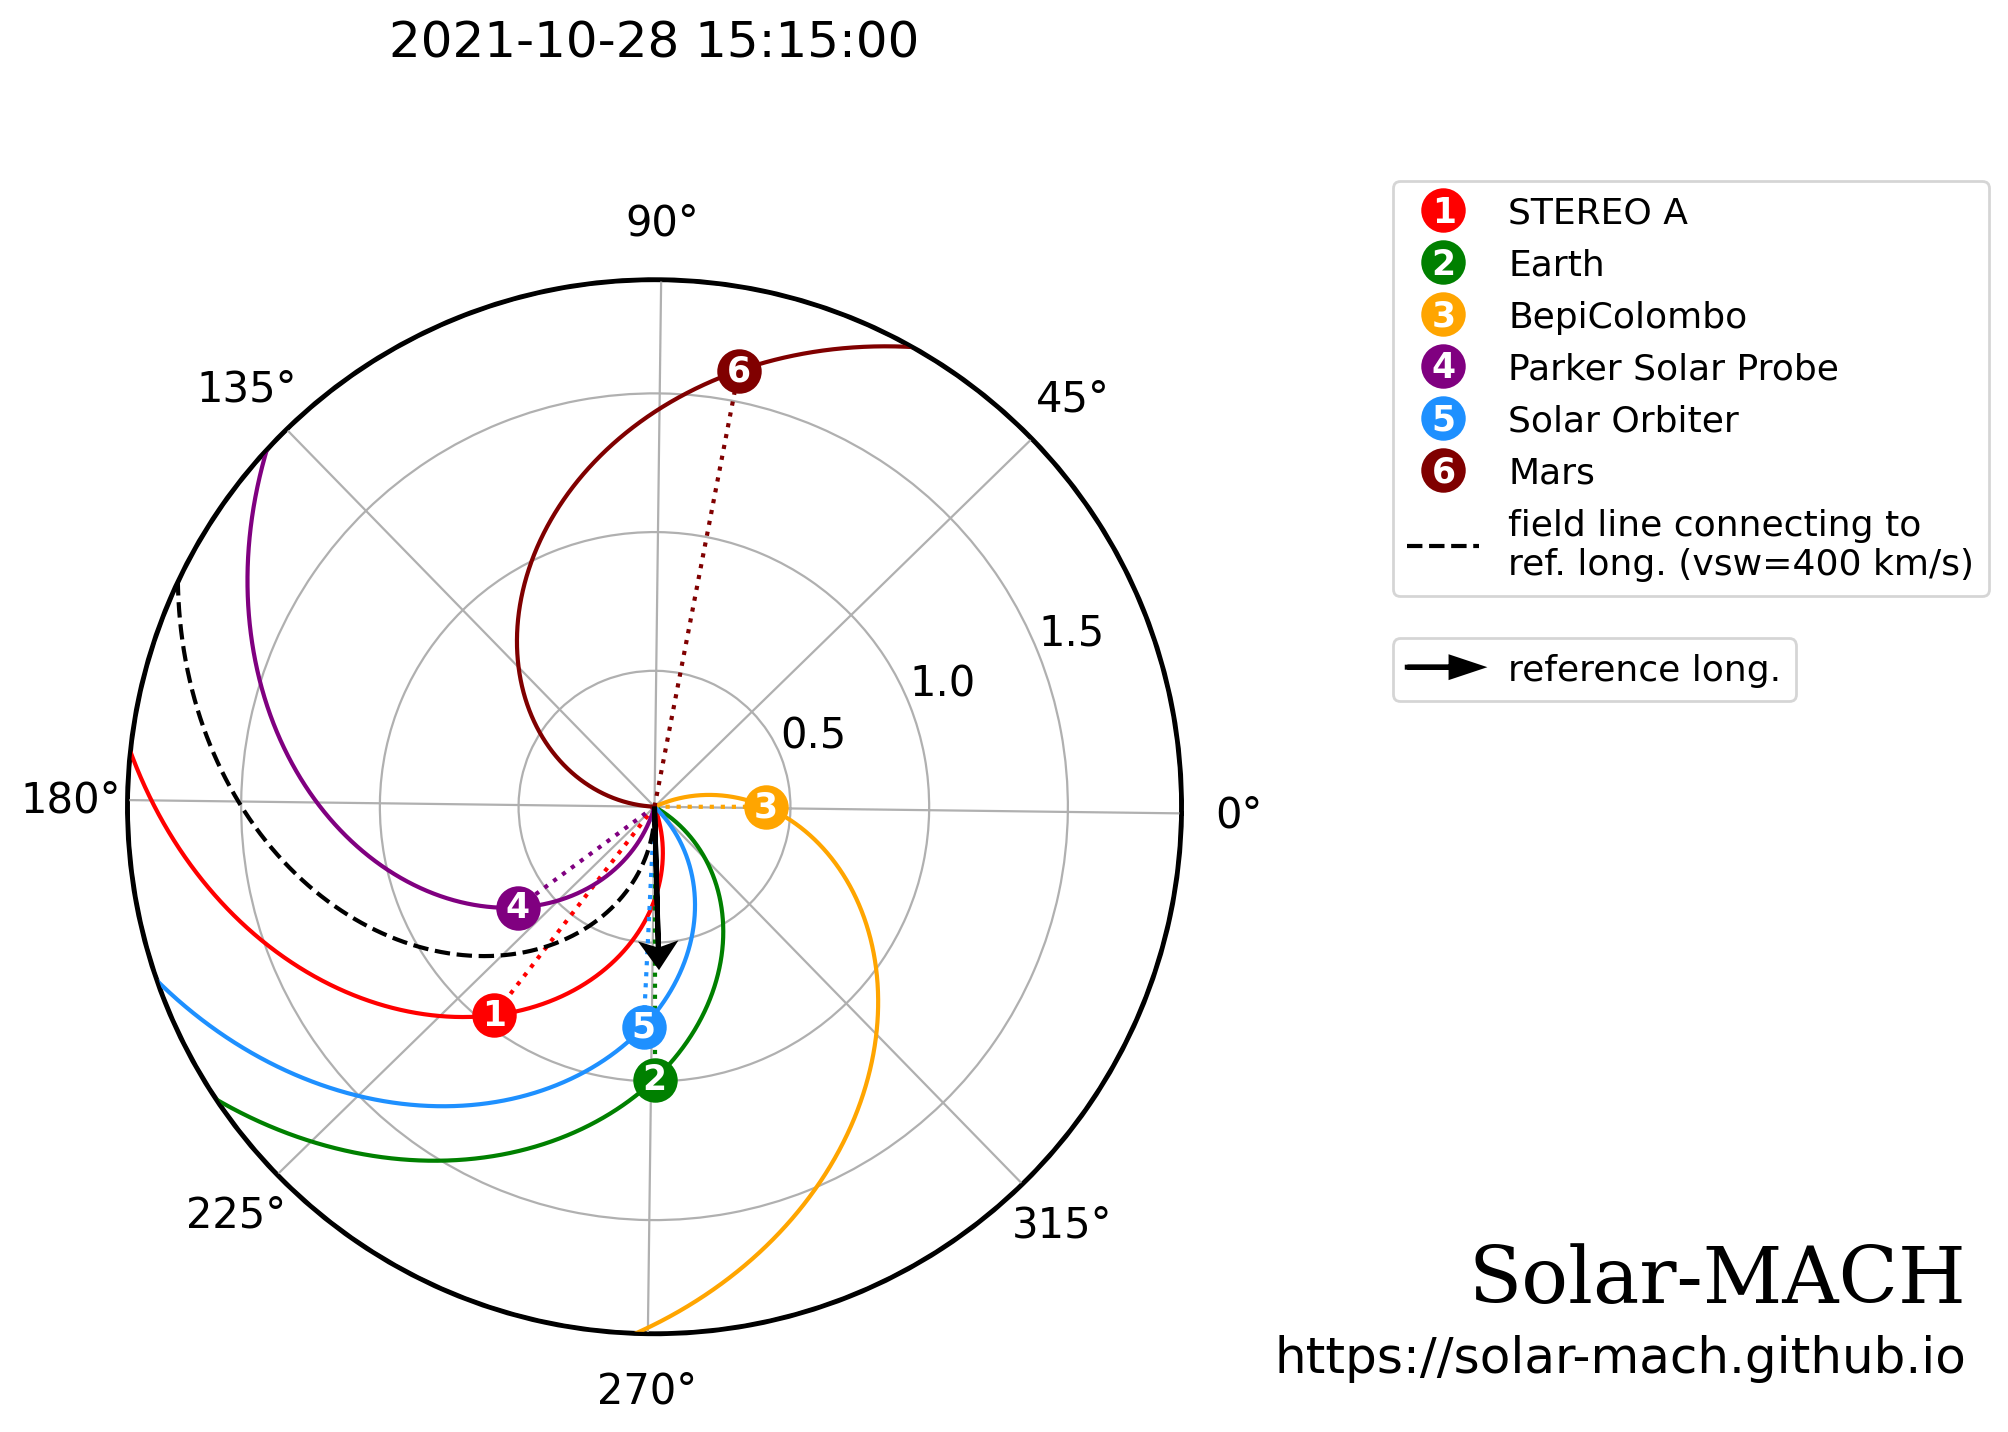

In [6]:
# make plot
sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
        show_earth_centered_coord=show_earth_centered_coord,reference_vsw=reference_vsw, 
        transparent=transparent, numbered_markers=numbered_markers)

In [7]:
# obtain data as Pandas DataFrame
sm.coord_table

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,233.1,7.2,1.0,-37.6,2.5,400,292.0,-39.6,19.2,-18.8
1,Earth,270.7,4.7,1.0,0.0,0.0,400,331.7,-2.0,59.0,-21.3
2,BepiColombo,0.7,0.9,0.4,-270.1,-3.8,400,25.9,-272.1,113.2,-25.1
3,PSP,217.1,3.9,0.6,-53.6,-0.9,400,255.3,-55.6,-17.4,-22.1
4,Solar Orbiter,267.9,2.2,0.8,-2.8,-2.5,400,317.3,-4.8,44.5,-23.8
5,Mars,79.8,-4.9,1.6,-190.9,-9.6,400,178.7,-192.9,-94.0,-30.9
